In [2]:
import pandas as pd

# Load the Excel file
file_path = "All Data.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the file
print(data.head())

          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
1  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural      Hydrological   
2  1900-0007-JAM      Yes    nat-bio-epi-vir        Natural        Biological   
3  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural       Geophysical   
4  1900-0009-TUR      Yes    nat-geo-ear-gro        Natural       Geophysical   

       Disaster Type  Disaster Subtype External IDs       Event Name  ISO  \
0              Storm  Tropical cyclone          NaN              NaN  USA   
1              Flood   Flood (General)          NaN              NaN  JAM   
2           Epidemic     Viral disease          NaN  Gastroenteritis  JAM   
3  Volcanic activity          Ash fall          NaN              NaN  JPN   
4         Earthquake   Ground movement          NaN              NaN  TUR   

   ... Reconstruction Costs ('000 US$)  \
0  ...  

In [3]:
# Create a new DataFrame by removing rows with NaN in specific columns
columns_to_check = ["Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)"]
cleaned_data = data.dropna(subset=columns_to_check)

print("New DataFrame with rows containing NaN in specified columns removed:")
print(cleaned_data)

# Verify the changes
print(f"Original DataFrame shape: {data.shape}")
print(f"Cleaned DataFrame shape: {cleaned_data.shape}")

New DataFrame with rows containing NaN in specified columns removed:
              DisNo. Historic Classification Key Disaster Group  \
0      1900-0003-USA      Yes    nat-met-sto-tro        Natural   
16     1902-0012-GTM      Yes    nat-geo-ear-gro        Natural   
19     1903-0002-USA      Yes    nat-hyd-flo-flo        Natural   
36     1905-0003-IND      Yes    nat-geo-ear-gro        Natural   
40     1905-0008-ALB      Yes    nat-geo-ear-gro        Natural   
...              ...      ...                ...            ...   
16910  2023-0843-USA       No    nat-met-sto-sev        Natural   
16929  2023-9234-ESP       No    nat-cli-dro-dro        Natural   
16934  2023-9651-BRA       No    nat-cli-dro-dro        Natural   
16936  2023-9868-USA       No    nat-cli-dro-dro        Natural   
16937  2023-9872-CHN       No    nat-cli-dro-dro        Natural   

      Disaster Subgroup Disaster Type  Disaster Subtype External IDs  \
0        Meteorological         Storm  Tropical cyclon

## Other variables

In [4]:
# Extract the year from the 'DisNo.' column
data['Year'] = data['DisNo.'].astype(str).str[:4].astype(int)

# Group by year and sum the relevant columns
time_series_data = data.groupby('Year')[[
    'Total Deaths', 
    'No. Injured', 
    'No. Affected', 
    'No. Homeless',
    'Total Affected', 
    'Magnitude Scale']].sum()


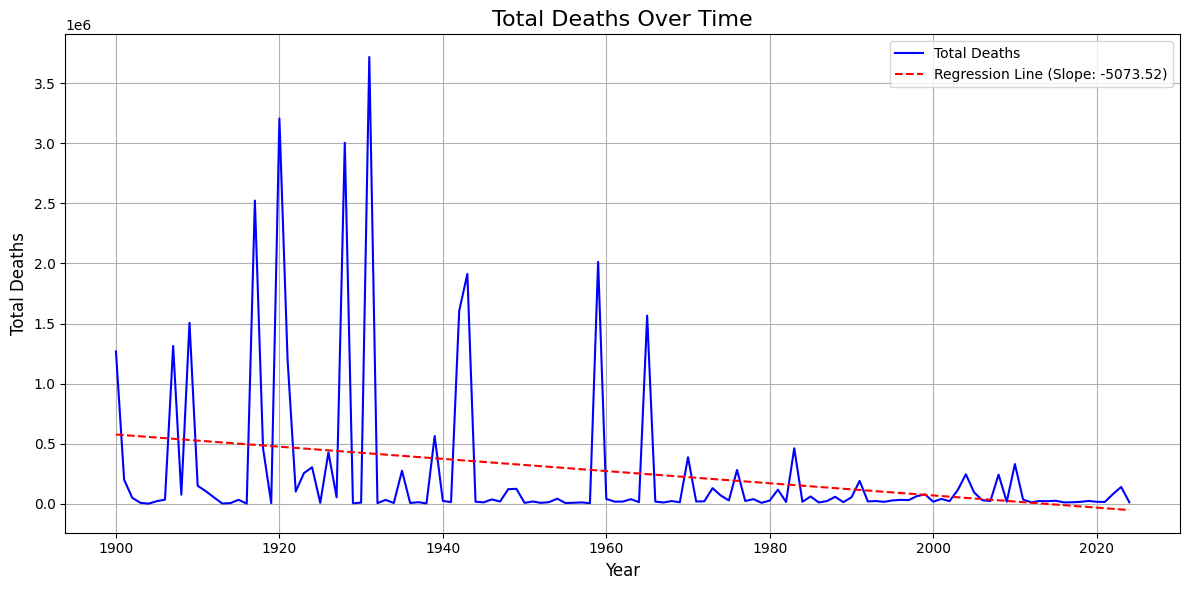

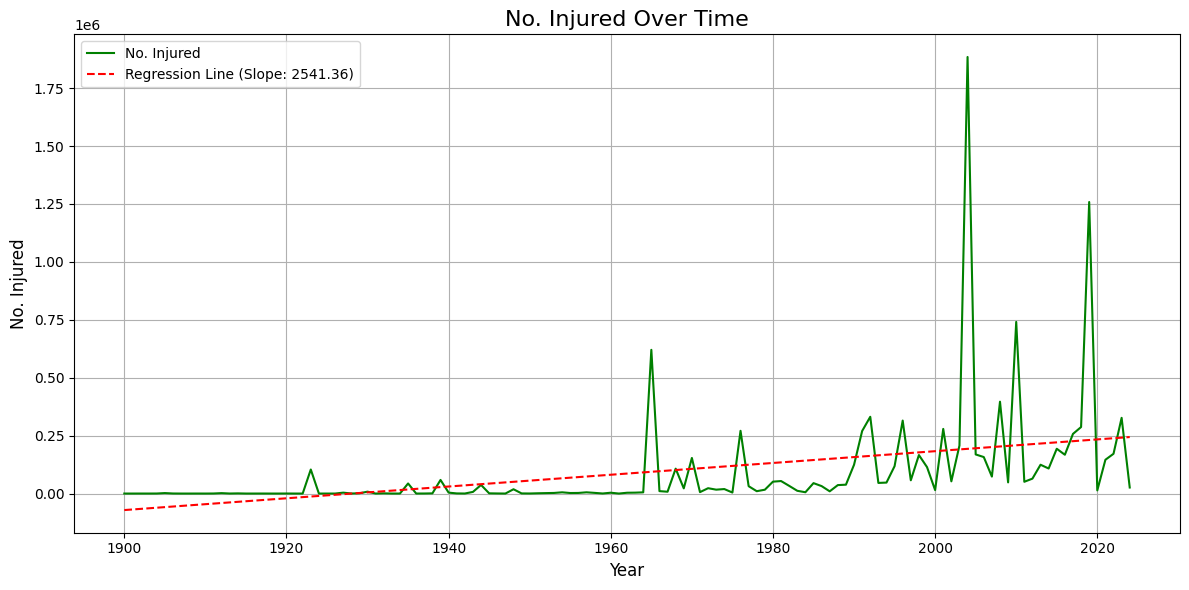

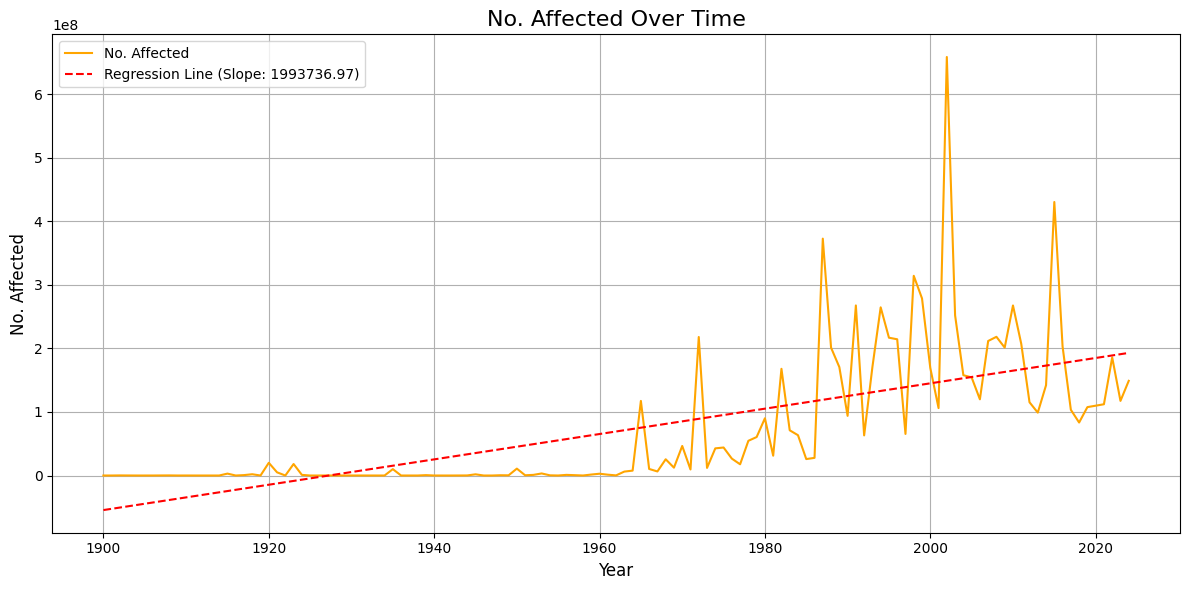

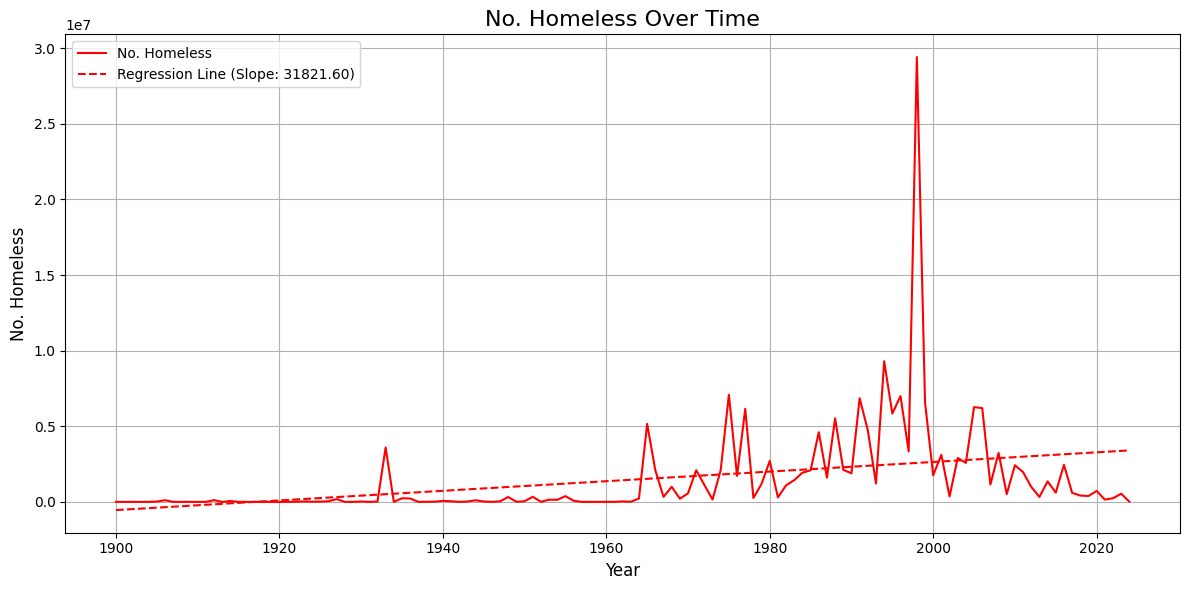

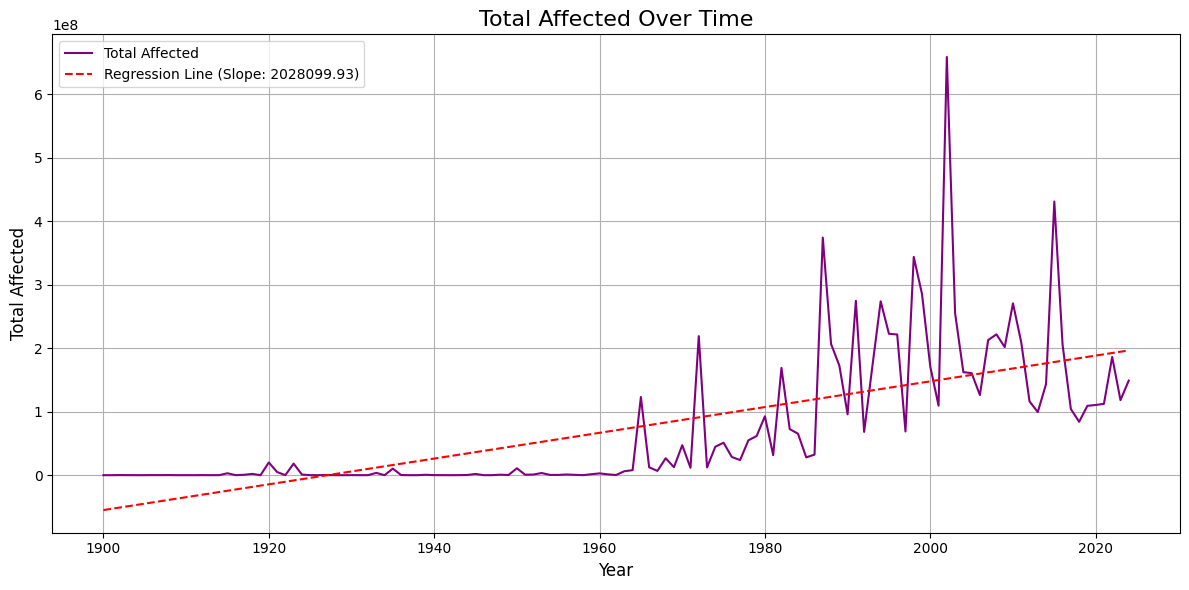

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Function to plot the data with regression line
def plot_with_regression(data, y_column, title, ylabel, color):
    plt.figure(figsize=(12, 6))
    
    # Ensure the index is numeric (year)
    data.index = pd.to_numeric(data.index, errors='coerce')
    
    # Ensure the y_column is numeric
    data[y_column] = pd.to_numeric(data[y_column], errors='coerce')
    
    # Remove rows where y_column or index is NaN
    data = data.dropna(subset=[y_column])

    # Plot the data
    plt.plot(data.index, data[y_column], color=color, linestyle='-', label=ylabel)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data.index, data[y_column])
    
    # Create regression line
    regression_line = slope * data.index + intercept
    plt.plot(data.index, regression_line, color='red', linestyle='--', label=f'Regression Line (Slope: {slope:.2f})')
    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example plot for Total Deaths with regression line
plot_with_regression(time_series_data, 'Total Deaths', 'Total Deaths Over Time', 'Total Deaths', 'blue')

# Example plot for No. Injured with regression line
plot_with_regression(time_series_data, 'No. Injured', 'No. Injured Over Time', 'No. Injured', 'green')

# Example plot for No. Affected with regression line
plot_with_regression(time_series_data, 'No. Affected', 'No. Affected Over Time', 'No. Affected', 'orange')

# Example plot for No. Homeless with regression line
plot_with_regression(time_series_data, 'No. Homeless', 'No. Homeless Over Time', 'No. Homeless', 'red')

# Example plot for Total Affected with regression line
plot_with_regression(time_series_data, 'Total Affected', 'Total Affected Over Time', 'Total Affected', 'purple')
